### Should This Loan be Approved or Denied?

The dataset that I used in this notebook:
[Kaggle URL](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied/code)

In [57]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download(
#     "mirbektoktogaraev/should-this-loan-be-approved-or-denied"
# )

# print("Path to dataset files:", path)

In [135]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Preprocessing

In [59]:
# Importing dataset

ds_path = "./SBAnational.csv"
df = pd.read_csv(ds_path)

df.head(10)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26752\3653536637.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ds_path)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,...,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,...,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [60]:
df.shape

(899164, 27)

#### Since the dataset is too huge we are using the first 1000 rows for this project

In [61]:
df = df[:10000]

In [62]:
df.shape

(10000, 27)

In [63]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.034112e+09,51338.617000,411505.385000,89.634700,9.91530,1.310700,0.593500,0.881900,2131.166100,0.794700
std,1.985379e+07,31042.167981,250319.544567,64.357289,130.36344,0.470731,3.660765,5.661939,11392.032757,0.681761
min,1.000014e+09,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.016645e+09,27602.250000,238210.000000,60.000000,2.00000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.034355e+09,48417.000000,448310.000000,84.000000,3.00000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.050797e+09,83642.000000,561710.000000,84.000000,8.00000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.069785e+09,99999.000000,928120.000000,358.000000,9992.00000,2.000000,150.000000,180.000000,91283.000000,2.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      10000 non-null  int64  
 1   Name               9996 non-null   object 
 2   City               10000 non-null  object 
 3   State              10000 non-null  object 
 4   Zip                10000 non-null  int64  
 5   Bank               9994 non-null   object 
 6   BankState          9994 non-null   object 
 7   NAICS              10000 non-null  int64  
 8   ApprovalDate       10000 non-null  object 
 9   ApprovalFY         10000 non-null  object 
 10  Term               10000 non-null  int64  
 11  NoEmp              10000 non-null  int64  
 12  NewExist           10000 non-null  float64
 13  CreateJob          10000 non-null  int64  
 14  RetainedJob        10000 non-null  int64  
 15  FranchiseCode      10000 non-null  int64  
 16  UrbanRural         1000

### Taking care of missing values

In [65]:
numOfMissingValues = df.isnull().sum()

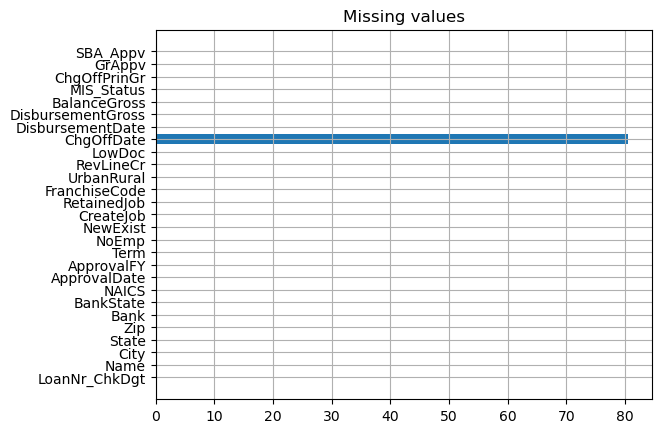

In [66]:
plt.title("Missing values")
plt.barh(
    (numOfMissingValues / len(df) * 100).index,
    (numOfMissingValues / len(df) * 100).values,
)
plt.grid(True)
plt.show()

In [67]:
df.duplicated().sum()

0

In [68]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [69]:
numerical_columns = [f for f in df.columns if df[f].dtype != "O"]

In [70]:
numerical_columns

['LoanNr_ChkDgt',
 'Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural']

In [71]:
df[numerical_columns].head(10)

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
0,1000014003,47711,451120,84,4,2.0,0,0,1,0
1,1000024006,46526,722410,60,2,2.0,0,0,1,0
2,1000034009,47401,621210,180,7,1.0,0,0,1,0
3,1000044001,74012,0,60,2,1.0,0,0,1,0
4,1000054004,32801,0,240,14,1.0,7,7,1,0
5,1000084002,6062,332721,120,19,1.0,0,0,1,0
6,1000093009,7083,0,45,45,2.0,0,0,0,0
7,1000094005,34491,811118,84,1,2.0,0,0,1,0
8,1000104006,32456,721310,297,2,2.0,0,0,1,0
9,1000124001,6073,0,84,3,2.0,0,0,1,0


In [72]:
df[numerical_columns].isnull().sum()

LoanNr_ChkDgt    0
Zip              0
NAICS            0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
dtype: int64

In [73]:
for f in numerical_columns:
    print(f, df[f].nunique())

LoanNr_ChkDgt 10000
Zip 5691
NAICS 807
Term 246
NoEmp 117
NewExist 3
CreateJob 44
RetainedJob 56
FranchiseCode 250
UrbanRural 3


In [74]:
df["UrbanRural"].value_counts()

UrbanRural
1    4931
0    3561
2    1508
Name: count, dtype: int64

In [75]:
categorical_columns = [f for f in df.columns if df[f].dtype == "O"]

In [76]:
categorical_columns

['Name',
 'City',
 'State',
 'Bank',
 'BankState',
 'ApprovalDate',
 'ApprovalFY',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

In [77]:
df[categorical_columns].head(10)

,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,28-Feb-97,1997,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,28-Feb-97,1997,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,28-Feb-97,1997,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,1997,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,1997,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,"TD BANK, NATIONAL ASSOCIATION",DE,28-Feb-97,1997,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,WELLS FARGO BANK NATL ASSOC,SD,2-Jun-80,1980,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,WEAVER PRODUCTS,SUMMERFIELD,FL,REGIONS BANK,AL,28-Feb-97,1997,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,TURTLE BEACH INN,PORT SAINT JOE,FL,CENTENNIAL BANK,FL,28-Feb-97,1997,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,WEBSTER BANK NATL ASSOC,CT,28-Feb-97,1997,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [78]:
df[categorical_columns].isnull().sum()

Name                    4
City                    0
State                   0
Bank                    6
BankState               6
ApprovalDate            0
ApprovalFY              0
RevLineCr               1
LowDoc                  0
ChgOffDate           8053
DisbursementDate       16
DisbursementGross       0
BalanceGross            0
MIS_Status             21
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [79]:
for f in categorical_columns:
    print(f, df[f].nunique())

Name 9716
City 3779
State 51
Bank 950
BankState 52
ApprovalDate 655
ApprovalFY 13
RevLineCr 6
LowDoc 3
ChgOffDate 1215
DisbursementDate 374
DisbursementGross 3261
BalanceGross 1
MIS_Status 2
ChgOffPrinGr 1715
GrAppv 1225
SBA_Appv 1505


In [80]:
df.drop(columns=["LoanNr_ChkDgt", "FranchiseCode"], inplace=True)

In [81]:
numerical_columns.remove("LoanNr_ChkDgt")
numerical_columns.remove("FranchiseCode")

In [82]:
numerical_columns

['Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'UrbanRural']

In [83]:
df["NewExist"] = df["NewExist"].astype("int")

df[numerical_columns].dtypes

Zip            int64
NAICS          int64
Term           int64
NoEmp          int64
NewExist       int32
CreateJob      int64
RetainedJob    int64
UrbanRural     int64
dtype: object

In [84]:
df["NewExist"].value_counts()

NewExist
1    6819
2    3144
0      37
Name: count, dtype: int64

In [85]:
for i in range(len(df)):
    if df["NewExist"].iloc[i] == 0:
        df["NewExist"].iloc[i] == 1

In [86]:
df.drop(columns=["Name", "ChgOffDate"], inplace=True)

In [87]:
categorical_columns.remove("Name")
categorical_columns.remove("ChgOffDate")

In [88]:
df.head(10)

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,...,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,...,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,...,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,...,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,...,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,...,0,N,N,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,...,0,N,N,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,...,0,N,Y,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,...,0,N,N,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,...,0,N,Y,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [89]:
df = df[~df["MIS_Status"].isna()]
df = df[~df["DisbursementDate"].isna()]

In [90]:
Missing_value_features = [
    feature for feature in categorical_columns if df[feature].isna().sum() > 0
]

In [91]:
Missing_value_features

['Bank', 'BankState', 'RevLineCr']

In [92]:
for f in Missing_value_features:
    print(f, df[f].isna().sum())

Bank 2
BankState 2
RevLineCr 1


In [93]:
for f in Missing_value_features:
    df[f].fillna(df[f].value_counts().index[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26752\2020462331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f].fillna(df[f].value_counts().index[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_26752\2020462331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [94]:
categorical_columns

['City',
 'State',
 'Bank',
 'BankState',
 'ApprovalDate',
 'ApprovalFY',
 'RevLineCr',
 'LowDoc',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

In [95]:
df[categorical_columns].isna().sum()

City                 0
State                0
Bank                 0
BankState            0
ApprovalDate         0
ApprovalFY           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [ ]:
Temporal_features = ["DisbursementDate", "ApprovalDate"]

for feature in Temporal_features:
    categorical_columns.remove(feature)

In [97]:
for feature in Temporal_features:
    df[feature] = pd.to_datetime(df[feature], dayfirst=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26752\1999495460.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_26752\1999495460.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)


In [98]:
df[Temporal_features].head(10)

,DisbursementDate,ApprovalDate
0,1999-02-28,1997-02-28
1,1997-05-31,1997-02-28
2,1997-12-31,1997-02-28
3,1997-06-30,1997-02-28
4,1997-05-14,1997-02-28
5,1997-06-30,1997-02-28
6,1980-07-22,1980-06-02
7,1998-06-30,1997-02-28
8,1997-07-31,1997-02-28
9,1997-04-30,1997-02-28


In [99]:
df["RevLineCr"] = df["RevLineCr"].map({"N": "N", "Y": "Y"})

In [100]:
df["RevLineCr"] = df["RevLineCr"].fillna("Unknown")

In [101]:
df["RevLineCr"].value_counts()

RevLineCr
N          4326
Y          3537
Unknown    2104
Name: count, dtype: int64

In [ ]:
df["LowDoc"] = df["LowDoc"].str.replace("C", "UnKnown")

In [103]:
df["LowDoc"].value_counts()

LowDoc
N          9015
Y           951
UnKnown       1
Name: count, dtype: int64

In [ ]:
Price_features = [
    "DisbursementGross",
    "BalanceGross",
    "ChgOffPrinGr",
    "GrAppv",
    "SBA_Appv",
]

In [105]:
df["DisbursementGross"] = (
    df["DisbursementGross"]
    .str.replace("$", "")
    .str.replace(",", "")
    .str.replace(" ", "")
)

In [ ]:
df["DisbursementGross"] = df["DisbursementGross"].astype("float")

In [107]:
df["BalanceGross"].value_counts()

BalanceGross
$0.00     9967
Name: count, dtype: int64

In [108]:
df.drop(columns=["BalanceGross"], inplace=True)

In [109]:
df["ChgOffPrinGr"] = (
    df["ChgOffPrinGr"].str.replace("$", "").str.replace(",", "").str.replace(" ", "")
)
df["SBA_Appv"] = (
    df["SBA_Appv"].str.replace("$", "").str.replace(",", "").str.replace(" ", "")
)
df["GrAppv"] = (
    df["GrAppv"].str.replace("$", "").str.replace(",", "").str.replace(" ", "")
)

In [110]:
df["ChgOffPrinGr"] = df["ChgOffPrinGr"].astype("float")
df["SBA_Appv"] = df["SBA_Appv"].astype("float")
df["GrAppv"] = df["GrAppv"].astype("float")

In [112]:
for f in Price_features:
    numerical_columns.append(f)
    categorical_columns.remove(f)

In [ ]:
numerical_columns.remove("BalanceGross")

In [ ]:
categorical_columns.remove("ApprovalFY")
numerical_columns.append("ApprovalFY")

### Encoding categorical Features

In [116]:
dictionary = {}

for f in categorical_columns:
    c = 1
    dictionary[f] = {}
    for unique in df[f].unique():
        dictionary[f][unique] = c
        c += 1

In [117]:
dictionary

{'City': {'EVANSVILLE': 1,
  'NEW PARIS': 2,
  'BLOOMINGTON': 3,
  'BROKEN ARROW': 4,
  'ORLANDO': 5,
  'PLAINVILLE': 6,
  'UNION': 7,
  'SUMMERFIELD': 8,
  'PORT SAINT JOE': 9,
  'GLASTONBURY': 10,
  'CHARLOTTE': 11,
  'CHICAGO': 12,
  'APEX': 13,
  'SLATERSVILLE': 14,
  'WINSTON-SALEM': 15,
  'OKLAHOMA CITY': 16,
  'MIDLAND': 17,
  'CENTREVILLE': 18,
  'PLANO': 19,
  'KNOXVILLE': 20,
  'DUMAS': 21,
  'CORAL SPRINGS': 22,
  'JOHNSTON': 23,
  'EULESS': 24,
  'LITTLE ROCK': 25,
  'SAINT PETER': 26,
  'INDEPENDENCE': 27,
  'MARSHFIELD': 28,
  'CAMARILLO': 29,
  'ANDERSON': 30,
  'MIAMI': 31,
  'DALLAS': 32,
  'NEW ORLEANS': 33,
  'WASHINGTON': 34,
  'LEANDER': 35,
  'ROANOKE': 36,
  'KINSMAN': 37,
  'NORTH EASTON': 38,
  'SPRINGFIELD': 39,
  'LEWISBURG': 40,
  'LOUISVILLE': 41,
  'LELAND': 42,
  'EDINBURGH': 43,
  'Newburgh': 44,
  'Dover (census name for Dover C': 45,
  'SMITHVILLE': 46,
  'Chicago': 47,
  'Marina del Ray': 48,
  'WINSOR MILL': 49,
  'SPOTSYLVANIA': 50,
  'Fall River': 

In [118]:
for feature in categorical_columns:
    df[feature] = df[feature].map(dictionary[feature])

In [120]:
df[Temporal_features].head(10)

,DisbursementDate,ApprovalDate
0,1999-02-28,1997-02-28
1,1997-05-31,1997-02-28
2,1997-12-31,1997-02-28
3,1997-06-30,1997-02-28
4,1997-05-14,1997-02-28
5,1997-06-30,1997-02-28
6,1980-07-22,1980-06-02
7,1998-06-30,1997-02-28
8,1997-07-31,1997-02-28
9,1997-04-30,1997-02-28


In [ ]:
df["AppYear"] = df["ApprovalDate"].dt.year
df["AppMonth"] = df["ApprovalDate"].dt.month
df["Dismonth"] = df["DisbursementDate"].dt.month

In [ ]:
numerical_columns.extend(["AppYear", "AppMonth", "Dismonth"])

In [ ]:
df.drop(columns=Temporal_features, inplace=True)

In [124]:
numerical_columns

['Zip',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'UrbanRural',
 'DisbursementGross',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'ApprovalFY',
 'AppYear',
 'AppMonth',
 'Dismonth']

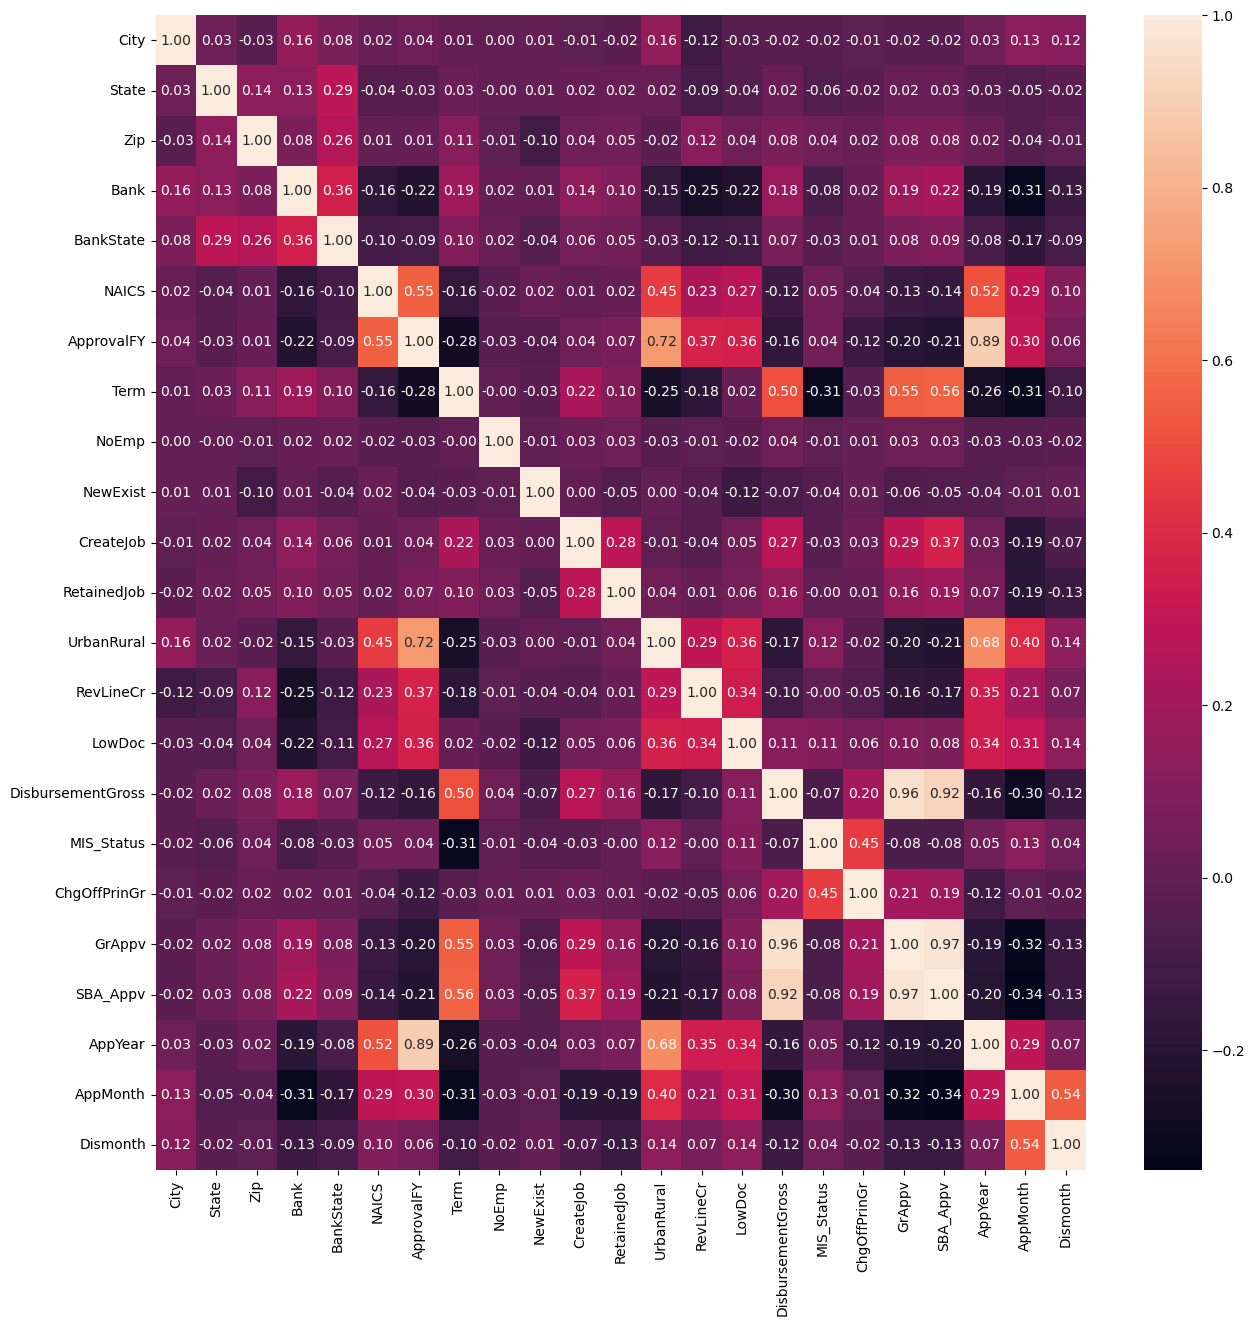

In [128]:
plt.figure(figsize=(15, 15))
plt.plot("CORELATION MATRIX ")
sns.heatmap(df.corr(), annot=True, fmt="0.2f")
plt.show()

In [ ]:
df.drop(columns=["City", "DisbursementGross", "GrAppv"], inplace=True)

In [131]:
categorical_columns.remove("City")
numerical_columns.remove("DisbursementGross")
numerical_columns.remove("GrAppv")

### Model training

In [134]:
X = df.drop(columns=["MIS_Status"])
y = df["MIS_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [145]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [146]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9929789368104313


<Axes: >

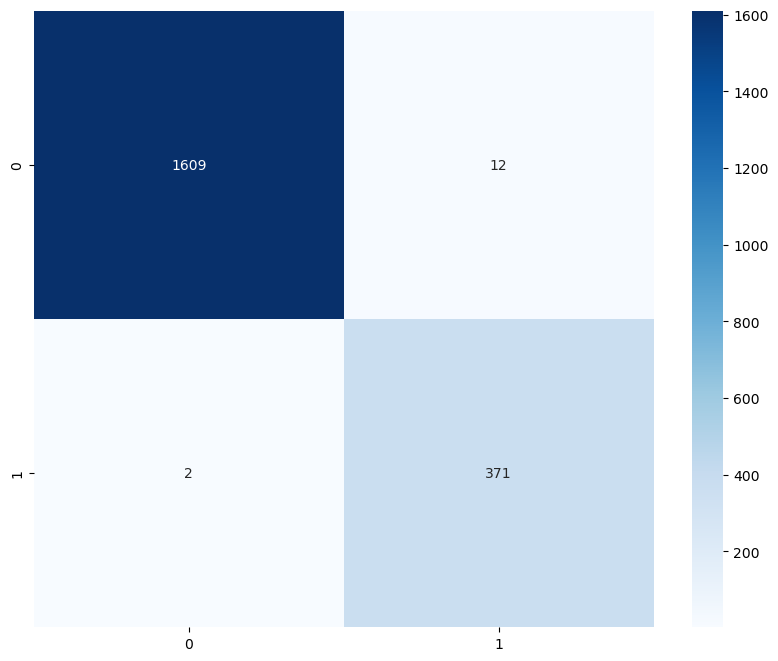

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00      1621
           2       0.97      0.99      0.98       373

    accuracy                           0.99      1994
   macro avg       0.98      0.99      0.99      1994
weighted avg       0.99      0.99      0.99      1994

